# Depressive Tweet Detection on Twitter dataset

## TEAM MEMBERS: Aayushi Dubey, Himani Mishra, Sheetal Rani Prasad

### ABSTRACT: 
Depression is one of the most prevalent health conditions around the globe. It has been
predicted that by the age of 65, one in three women and one in five men could experience a severe
depressive episode. Studies indicate there is correlation between depression and increased usage of
social media. The ubiquity of social media in human lives presents us with a rich dataset which can
also be utilized for medical purposes. So, for this project we are using the tweets data from Twitter.
We shall be extracting two types of tweets: random and depressive using Twitter APIs. The next stage
would be data preparation, followed by feature extraction and then classification using python
libraries. We will build two classifiers using Naïve Bayes and Support Vector Machine algorithms
and compare the accuracy for the same. The ML model which is more accurate will be used for
predicting whether a given tweet is depressive or not. An extended application of this project can (be
used) to come up with an architecture that limits diffusion of depressive tweets into social media.

### DATASETS:
* Number of records: 24000 (tweets)
* Number of columns (fields/ features): tweets, class of tweet (0: random tweet, 1: depressive tweet)
* Column data types: Text, Number

### REFERENCES:
[1] Machine Learning-based Approach for Depression Detection in Twitter Using Content and
Activity Features. Hatoon AlSagri, Mourad Ykhlef <br>
[2] Predicting Anxiety, Depression and Stress in Modern Life using Machine Learning
Algorithms. Anu Priya, Shruti Garg, Neha Prerna Tigga

## Code :

#### Step 1 : Scraping Depressive Tweets Data from Twitter Using Twint

In [73]:
#!pip3 install twint
#!pip install nest_asyncio
import twint
import nest_asyncio
nest_asyncio.apply()
#configuration
def scrap_twitter_data(keyword, limit):
    config = twint.Config()
    config.Search = keyword
    config.Limit = limit
    config.Lang = "en"
    config.Hide_output  = True
    config.Pandas  = True
    #running search
    twint.run.Search(config)
    depressed_df = twint.storage.panda.Tweets_df
    depressed_df.to_csv('./'+keyword+'.csv', index=False)

In [74]:
#scrap_twitter_data("Depressed", 400)
#scrap_twitter_data("Depression", 400)
#scrap_twitter_data("Hopeless", 400)
#scrap_twitter_data("Lonely", 400)
#scrap_twitter_data("Suicide", 400)
#scrap_twitter_data("crying", 400)
#scrap_twitter_data("anxiety", 400)
#scrap_twitter_data("sad", 400)

In [75]:
import pandas as pd
depressive_twint_tweets_df = pd.concat([pd.read_csv('Depressed.csv'), pd.read_csv('Depression.csv'), pd.read_csv('Hopeless.csv'), pd.read_csv('Lonely.csv'), pd.read_csv('Suicide.csv'), pd.read_csv('crying.csv'), pd.read_csv('anxiety.csv'), pd.read_csv('sad.csv')], ignore_index=True).drop_duplicates()

depressive_twint_tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1595255277817036802,1595255277817036802,1.669173e+12,2022-11-22 19:17:51,-800,NaN,Depressed nets fan because everyone said it’s ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1595255267775885314,1595255263829053440,1.669173e+12,2022-11-22 19:17:48,-800,NaN,after getting out and u still find urself layi...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1595255251757670401,1595255251757670401,1.669173e+12,2022-11-22 19:17:45,-800,NaN,I need some head I’m depressed.,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1595255218924552192,1595254936585084929,1.669173e+12,2022-11-22 19:17:37,-800,NaN,"@visavisachan idk how often you go out, but de...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'visavisachan', 'name': 'savi...",NaN,NaN,NaN,NaN
4,1595255191242084352,1595255191242084352,1.669173e+12,2022-11-22 19:17:30,-800,NaN,Spike ball fact: College kids would be severly...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,1595253099358486528,1595203063719288832,1.669173e+12,2022-11-22 19:09:11,-800,NaN,@SpeakerPelosi You are such a hateful person h...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpeakerPelosi', 'name': 'Nan...",NaN,NaN,NaN,NaN
3283,1595253097709846528,1595250835096621057,1.669173e+12,2022-11-22 19:09:11,-800,NaN,@elonmusk Sad woke ppl,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
3284,1595253096078348288,1595253096078348288,1.669173e+12,2022-11-22 19:09:11,-800,NaN,"Vivir la soltería, renunciar a mi trabajo y en...",es,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3285,1595253095709433856,1595250840973234176,1.669173e+12,2022-11-22 19:09:11,-800,NaN,@yurayura_sad うん!2人 ̖́-,ja,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'yurayura_sad', 'name': 'ゆらくん...",NaN,NaN,NaN,NaN


In [76]:
depressive_twint_tweets_df.to_csv(r'depressive_twint_tweets.csv')

In [ ]:
depressive_twint_tweets_df = pd.read_csv(r'depressive_twint_tweets.csv', header = 0, usecols = ["tweet"])
depressive_twint_tweets_df["label"] = 1
depressive_twint_tweets_df

#### Step 2: [Kaggle Random Positive Tweet Dataset](https://www.kaggle.com/datasets/kazanova/sentiment140)

In [78]:
random_tweets_df = pd.read_csv(r'random_tweets.csv', encoding = "ISO-8859-1", header = None, usecols = [0,5])
random_tweets_df.columns = ['target','tweet']
random_tweets_df = random_tweets_df[random_tweets_df['target']>3].sample(10000).drop(['target'], axis=1)
random_tweets_df["label"] = 0
random_tweets_df

,tweet,label
1259329,@GrumpyYetAmusin @mikdev hahahaha! ROFLMAO! Yo...,0
1087299,A great day .. planning a big holiday.. Kodai ...,0
1422872,@futuredoll yes i am. i like it alot,0
1156767,"work was suprisingly well, good",0
1238520,Very happy about the traffic on my site www.de...,0
...,...,...
1090711,REALLi needz to unpack THIS weekend!! I've bee...,0
809105,WOW.... Ubuntu beta on my netbook.,0
1118629,watching &quot;Miley:Under The Skin&quot; .. m...,0
1283010,@mediocre_mum that's true maybe a job closer ...,0


#### Step 3: Data Analysis

In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

#!pip install nltk
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import PorterStemmer

#!pip install wordcloud
from wordcloud import WordCloud

#!pip install tweet-preprocessor
import preprocessor as p

from gensim.models import KeyedVectors

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [156]:
contractions = pd.read_json('contractions.json', typ='series')
contractions = contractions.to_dict()
c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        tweet = p.clean(tweet)
        
        #expand contraction
        tweet = expandContractions(tweet)

        #remove punctuation
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

        #stop words
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)
        
        tweet = " ".join(re.sub(r'https?://\S+', '', tweet).split())
        
        tweet = tweet.replace("https","")
        
        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

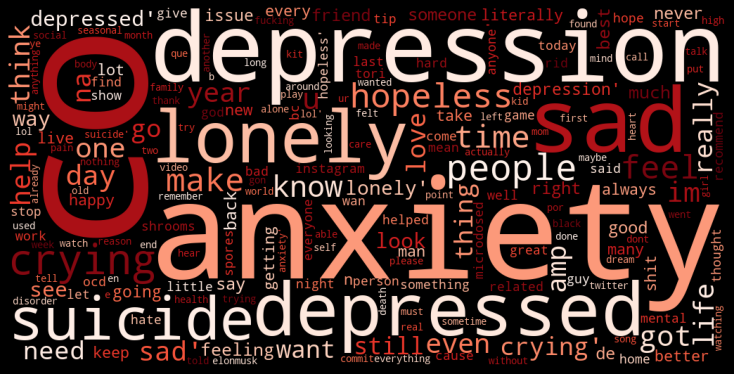

In [143]:
depressive_tweets = [clean_tweets([t for t in depressive_twint_tweets_df['tweet']])]
depressive_words = ' '.join(list(map(str, depressive_tweets)))
depressive_wc = WordCloud(width = 1024,height = 512, collocations=False, colormap="Reds").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

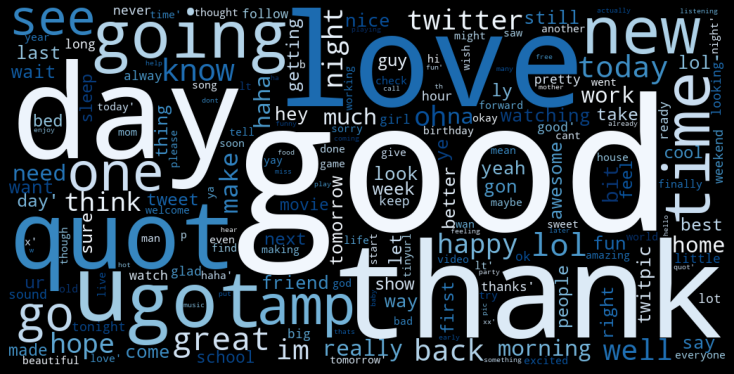

In [138]:
random_tweets = [clean_tweets([t for t in random_tweets_df['tweet']])]
random_tweets_words = ' '.join(list(map(str, random_tweets)))
random_tweets_wc = WordCloud(width = 1024,height = 512, collocations=False, colormap="Blues").generate(random_tweets_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(random_tweets_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### Step 4: Merged Dataset

In [83]:
merged_tweets_df = pd.concat([depressive_twint_tweets_df,random_tweets_df]) # merge the dataset on normal tweets and depressive tweets
merged_tweets_df = merged_tweets_df.sample(frac=1)  # shuffle the dataset
merged_tweets_df

,tweet,label
889029,Morning Tweeple! Drinking mocha frappe as Ty e...,0
909544,@karenthecrasian @caitlnnnnnnn you can have @t...,0
951365,@LindseyMadonna you have her name in your twit...,0
1557251,@erikaANGEL he'd be like yayyyy haaa no hed p...,0
881754,Going to see Wolverine today. Looking forward ...,0
...,...,...
899938,"lunch with mama, din with my roomie and cuddle...",0
994928,Picking fresh strawberries from Garden Yum-O,0
996377,@DavidArchie Good Morning David! I felt that e...,0
1433558,"@Beela_arg yes, that what i mean hehe.",0


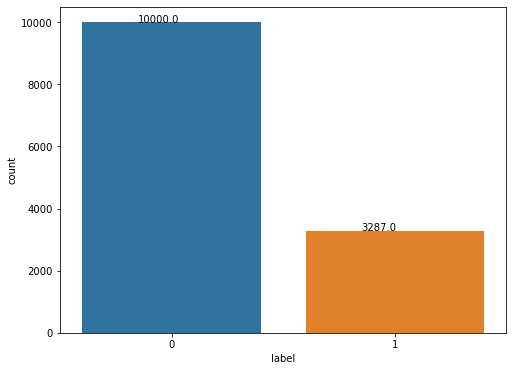

In [154]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x ='label', data = merged_tweets_df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#### Step 5: Data Cleaning

In [157]:
X = clean_tweets([t for t in merged_tweets_df['tweet']])
len(X)

13287

#### Step 6: Train Test Dataset Split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, merged_tweets_df.label, test_size=0.3, random_state = 42)
print(len(x_train),y_train.shape[0])
print(len(x_test),y_test.shape[0])

9300 9300
3987 3987


#### Step 7: Modeling

* Multinomial Naive Bayes Classifier for Classifying depressive & non-depressive Tweets:

Multinomial Naive Bayes Classifier for Classifying depressive & non-depressive Tweets:
accuracy 0.8888888888888888
              precision    recall  f1-score   support

           0    0.87305   0.99901   0.93179      3029
           1    0.99424   0.54071   0.70047       958

    accuracy                        0.88889      3987
   macro avg    0.93365   0.76986   0.81613      3987
weighted avg    0.90217   0.88889   0.87621      3987



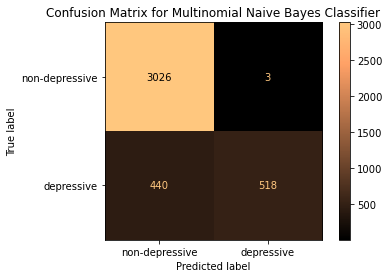

In [130]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import plot_confusion_matrix

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('Multinomial Naive Bayes Classifier for Classifying depressive & non-depressive Tweets:')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(nb,
        x_test,
        y_test,
        display_labels=['non-depressive','depressive'],
        cmap=plt.cm.copper)
cmd.ax_.set_title("Confusion Matrix for Multinomial Naive Bayes Classifier")
plt.show()

* Support Vector Machine Classifier for Classifying depressive & non-depressive Tweets:

Support Vector Machine Classifier for Classifying depressive & non-depressive Tweets:
accuracy 0.981439678956609
              precision    recall  f1-score   support

           0    0.97986   0.99604   0.98788      3029
           1    0.98678   0.93528   0.96034       958

    accuracy                        0.98144      3987
   macro avg    0.98332   0.96566   0.97411      3987
weighted avg    0.98153   0.98144   0.98127      3987



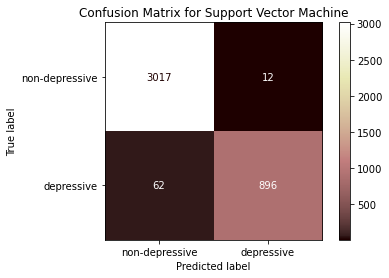

In [146]:
from sklearn import svm

svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC(kernel='linear', gamma=2)),
               ])
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print('Support Vector Machine Classifier for Classifying depressive & non-depressive Tweets:')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))
cmd = ConfusionMatrixDisplay.from_estimator(svm,
        x_test,
        y_test,
        display_labels=['non-depressive','depressive'],
        cmap=plt.cm.pink)
cmd.ax_.set_title("Confusion Matrix for Support Vector Machine")
plt.show()

* Logistic Regression Classifier for Classifying depressive & non-depressive Tweets:

accuracy 0.9418108853774768
              precision    recall  f1-score   support

           0    0.97072   0.95213   0.96133      3029
           1    0.85728   0.90919   0.88247       958

    accuracy                        0.94181      3987
   macro avg    0.91400   0.93066   0.92190      3987
weighted avg    0.94346   0.94181   0.94238      3987



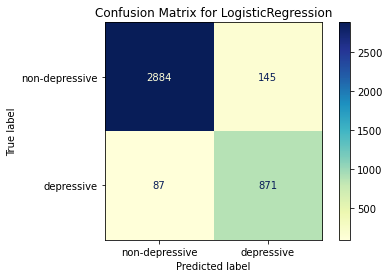

In [131]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Logistic Regression Classifier for Classifying depressive & non-depressive Tweets:')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(logreg,
        x_test,
        y_test,
        display_labels=['non-depressive','depressive'],
        cmap=plt.cm.YlGnBu)
cmd.ax_.set_title("Confusion Matrix for Logistic Regression")
plt.show()